In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel('Data_Train.xlsx', parse_dates=True)

In [ ]:
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
df.shape

(10683, 11)

The dataset contains the data for prediction of flight price for various airlines based on various parameters. The dataset is having 11 variables with 10683 records. 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# Description, null values, duplicated values of the dataset

In [ ]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Since only one value of null is present for Route and Total_Stops variable, we remove those.

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

To check for duplicates in the dataset.

In [ ]:
df[df.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


The duplicates has to be removed. Since, the time and date cant be duplicated even though the source and destination are.

In [ ]:
df.drop_duplicates(keep = 'first', inplace = True)
# keep = first represents, it keeps first value in dataframe and the next duplicated values will be deleted.

In [ ]:
df.shape

(10462, 11)

In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

# Splitting the dataset 

The current dataset contains data, month and time integrated. This is splitted to analyse more.

In [ ]:
# Date of Journey
df['Date_of_Journey'] = df['Date_of_Journey'].astype('datetime64[ns]')

In [ ]:
df['Journey_day'] = df['Date_of_Journey'].dt.day
df['Journey_month'] = df['Date_of_Journey'].dt.month
#df['Journey_year'] = df['Date_of_Journey'].dt.year
df.drop(['Date_of_Journey'], axis = 1, inplace=True)

In [ ]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1


In [ ]:
# Dep_time - Departure time splitting
df[['Dep_hr','Dep_m']] = df['Dep_Time'].astype(str).str.split(':', expand=True).astype(int)
df.drop(['Dep_Time'], axis = 1, inplace = True)

In [ ]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hr,Dep_m
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,3,1,16,50


In [ ]:
# Arrival time split
df['Arrival_hour'] = pd.to_datetime(df.Arrival_Time).dt.hour
df['Arrival_min'] = pd.to_datetime(df.Arrival_Time).dt.minute
df.drop(['Arrival_Time'], axis = 1, inplace = True)

In [ ]:
df.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hr,Dep_m,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25


In [ ]:
df.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hr,Dep_m,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25


In [ ]:
df.dtypes

Airline            object
Source             object
Destination        object
Route              object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
Journey_day         int64
Journey_month       int64
Dep_hr              int64
Dep_m               int64
Arrival_hour        int64
Arrival_min         int64
dtype: object

# Data Analysis

In [ ]:
df['Journey_month'].value_counts()

6     2465
3     2169
5     2025
9     1375
1     1058
12     946
4      424
Name: Journey_month, dtype: int64

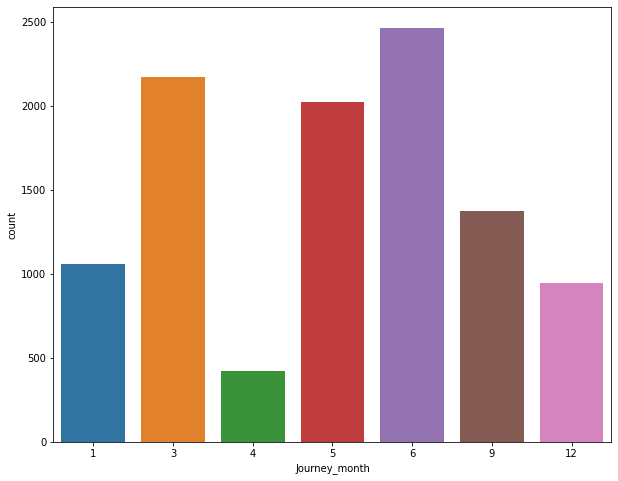

In [ ]:
plt.subplots(figsize = (10, 8))
sns.countplot(x = 'Journey_month', data = df)
plt.show()

The above bar plot represents the amount of flights ran during each month. We can see that for the month of June, 2465 flights have ran followed by 2169 flight in March. In April very less amount of flights have run. Lets analyse what flights ran in June month.

In [ ]:
df_june = df[df['Journey_month'] == 6]
df_june.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hr,Dep_m,Arrival_hour,Arrival_min
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,9,0,11,25
12,Air India,Chennai,Kolkata,MAA → CCU,2h 15m,non-stop,No info,4667,24,6,11,40,13,55


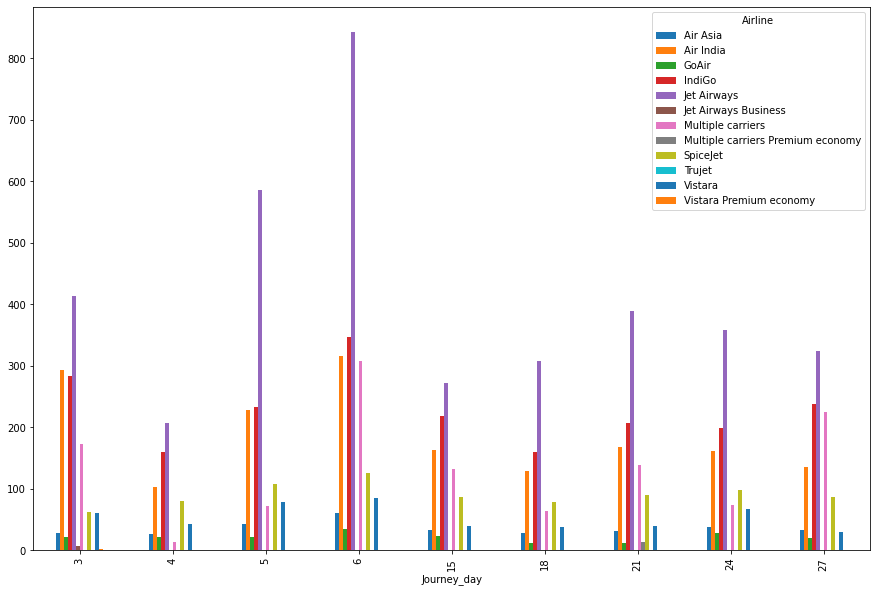

In [ ]:
data = df.groupby(['Journey_day', 'Airline'])['Journey_day'].count()
data.unstack().plot.bar(figsize = (15, 10))
plt.show()

From the analysis in June month, we can observe following things:

1. JetAirways ran through all the days with 800+ flights on 6th.
2. GoAir ran least no of flights on all days where TrueJet is not considered.

# Replace airline names

I have found that New Delhi is present in Destination and Delhi is present in Source. Both these places are same. So, we replace New Delhi by Delhi.

In [ ]:
df.replace(to_replace ='New Delhi', value = 'Delhi', regex = True, inplace=True) 

# Count of each individual flights

In [ ]:
df['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

We can see that JetAirways has around 3700 flights. So for each month, it runs many flights.

In [ ]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hr,Dep_m,Arrival_hour,Arrival_min
0,IndiGo,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [ ]:
df[(df.Source=='Banglore')&(df.Destination=='Delhi')].count()[0]

2179

Source    Destination  Airline                          
Banglore  Delhi        Air Asia                               89
                       Air India                             329
                       GoAir                                  93
                       IndiGo                                513
                       Jet Airways                           787
                       Jet Airways Business                    4
                       SpiceJet                              178
                       Vistara                               184
                       Vistara Premium economy                 2
Chennai   Kolkata      Air India                              25
                       IndiGo                                184
                       SpiceJet                              128
                       Vistara                                43
                       Vistara Premium economy                 1
Delhi     Cochin       Air Asia  

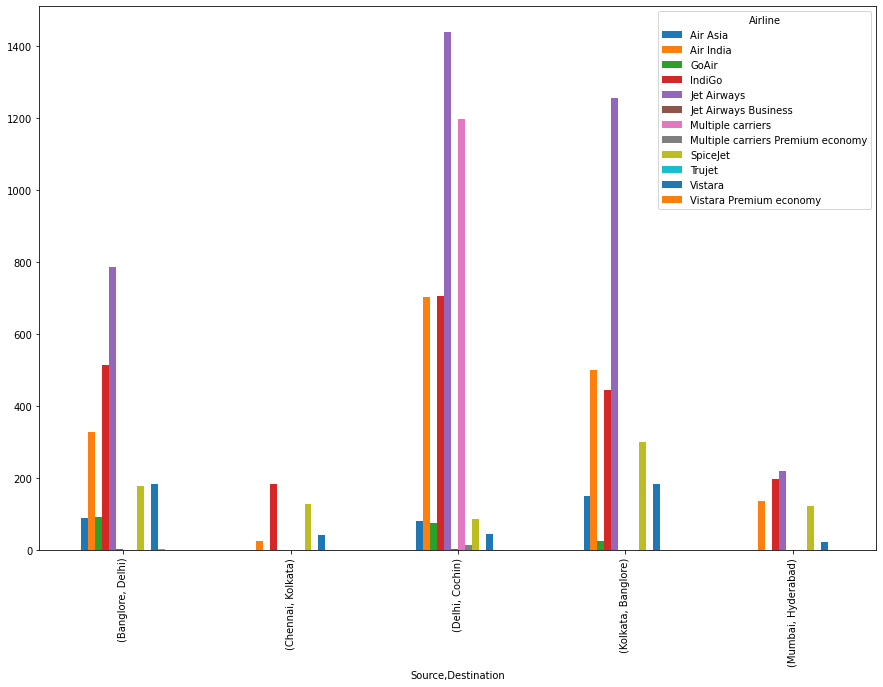

In [ ]:
data2 = df.groupby(['Source', 'Destination', 'Airline'])['Destination'].count()
print(data2)
data2.unstack().plot.bar(figsize = (15, 10))
plt.show()

The above bar plot represents the no of flights ran from Different source to destination. We can see that large amount of flights ran from Delhi to Cochin in which Jet Airways giving the major contribution.

In [ ]:
#data3 = df.groupby(['Source', 'Destination', 'Airline'])['Destination'].count()
#print(data3.index[1], data3.values[1])
"""
for i in range(len(data3)):
  print(data3.index[i], data3.values[i])
"""

'\nfor i in range(len(data3)):\n  print(data3.index[i], data3.values[i])\n'

# Price analysis based on different variables

Price based on Additional info

In [ ]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hr,Dep_m,Arrival_hour,Arrival_min
0,IndiGo,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15


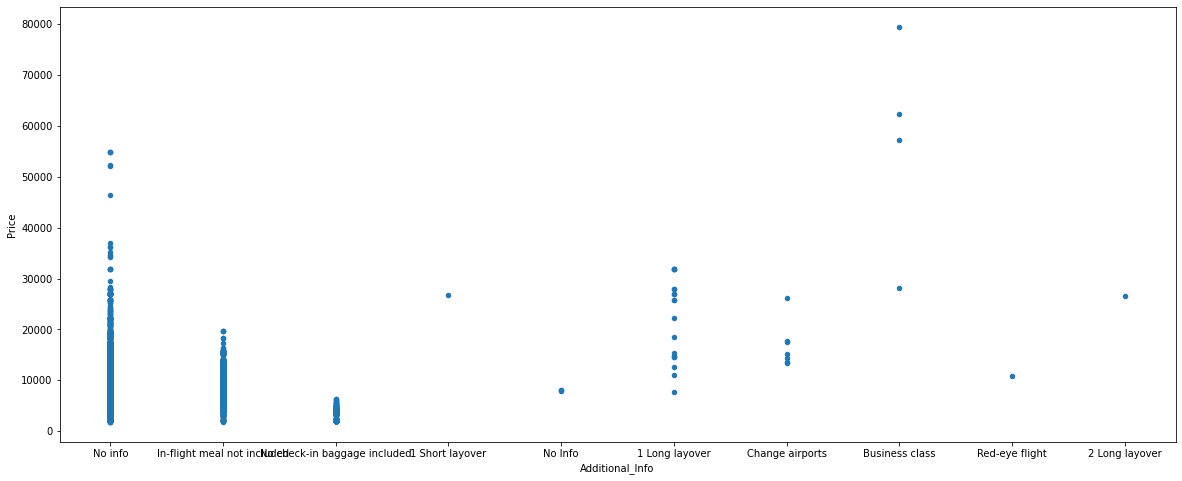

In [ ]:
df.plot.scatter('Additional_Info', 'Price', figsize = (20, 8))
plt.show()

The price with Business Class has a max price with minimum starting from around 30k.

Price based on Total stops

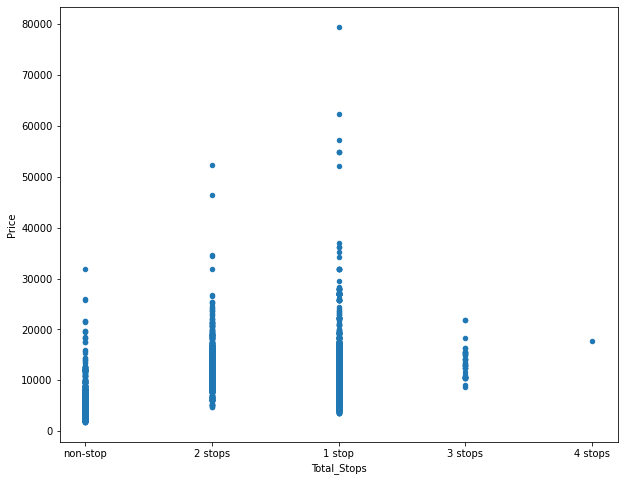

In [ ]:
df.plot.scatter('Total_Stops', 'Price', figsize = (10,8))
plt.show()

In [ ]:
df.select_dtypes(include='object')

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info
0,IndiGo,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info
...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info
10681,Vistara,Banglore,Delhi,BLR → DEL,2h 40m,non-stop,No info


The above dataframe contains object data types.
1. Expect duration variable, other variables has to be converted to Categorical datatypes so that it will be useful for Machine learning model.
2. The Duration variable has to be convert to numerical or int values by converting 1hr = 60 min and adding to respective minutes.
3. After this, the remaining datasets are added and the dataset is ready for ML model.

# Conclusion

1. The dataset represents the price of flights based on various parameters.
2. The conversion of date and time for respective variables has been done.
3. The duplicate values have been removed.
4. We observe that Jet Airways has the highest no of flights.
5. The flight distance from Delhi to Chennai are most.
6. The variation between additional_info and price have been found out.
7. The object datatypes needs to be converted to Categorical for ML model.